# Read and Visualize ESRI shapefile data


## ESRI Shapefile (.shp)

"The shapefile format is a geospatial vector data format for geographic information system (GIS) software. It is developed and regulated by Esri as a mostly open specification for data interoperability among Esri and other GIS software products. The shapefile format can spatially describe vector features: points, lines, and polygons, representing, for example, water wells, rivers, and lakes. Each item usually has attributes that describe it, such as name or temperature." (Wiki)



## Data Source: GRDC - Global Runoff Data Center

GRDC distributes river basin files in GeoJSON and .shp formats

https://www.bafg.de/GRDC/EN/02_srvcs/22_gslrs/221_MRB/riverbasins_node.html

---
DTR

# Import Packages

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [4]:
import cartopy.io.img_tiles as cimgt
#NB: Stamen basemaps are not be available from the usual source from 31 Oct 2023

In [5]:
import geopandas as gpd

In [6]:
gpd.__version__

'0.13.2'

In [7]:
import fiona

In [8]:
fiona.__version__

'1.9.4'

In [9]:
import os

## Directory Management

In [10]:
os.getcwd()

'/media/donald/disk4nvme/GEOSPATIAL_DATA_READ_PROCESS'

In [11]:
dir_data = '/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/World_River_Basins/Congo_RB_SHP_GRDC/'
dir_data

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/World_River_Basins/Congo_RB_SHP_GRDC/'

In [12]:
# list the files in the directory
os.listdir(dir_data)

['mrb_rivers.shp',
 'mrb_basins.shp',
 'mrb_rivnets_Q08_09.dbf',
 'mrb_rivernames.dbf',
 'mrb_rivernames.shp',
 'mrb_rivnets_Q09_10.shx',
 'mrb_rivernames.shx',
 'readme_mrb.txt',
 'mrb_rivers.shx',
 'mrb_basins.shx',
 'mrb_rivnets_Q08_09.shp',
 'mrb_rivers.dbf',
 'mrb_rivnets_Q09_10.shp',
 'mrb_rivnets_Q08_09.shx',
 'mrb_basins.dbf',
 'mrb_rivnets_Q09_10.dbf',
 'mrb_basins.prj',
 'mrb_rivnets_Q08_09.prj',
 'mrb_rivernames.prj',
 'mrb_rivnets_Q09_10.prj',
 'mrb_rivers.prj']

# Filename

In [13]:
fname_basin =   os.path.join(dir_data, 'mrb_basins.shp')
fname_basin

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/World_River_Basins/Congo_RB_SHP_GRDC/mrb_basins.shp'

In [14]:
fname_rivers =   os.path.join(dir_data, 'mrb_rivers.shp')
fname_rivers

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/World_River_Basins/Congo_RB_SHP_GRDC/mrb_rivers.shp'

# Read the data using geopandas

In [15]:
gdf_basin = gpd.read_file(fname_basin)

In [16]:
gdf_basin

,OBJECTI,MRBID,CONTINE,SEA,OCEAN,SUM_SUB,Shp_Lng,Shap_Ar,RIVERBA,geometry
0,9,1209,Africa,South Atlantic,Atlantic Ocean,3705225.4,143.361965,301.262206,CONGO,"MULTIPOLYGON (((33.02083 -9.67083, 33.02557 -9..."


read rivers

In [17]:
gdf_rivers = gpd.read_file(fname_rivers)

In [18]:
gdf_rivers

,OBJECTI,MRBID,RIVERBA,RIVER,CONTINE,SEA,OCEAN,Shp_Lng,geometry
0,165,1209,CONGO,Aruwimi,Africa,South Atlantic,Atlantic Ocean,10.147184,"LINESTRING (29.96458 2.36875, 29.96875 2.36458..."
1,166,1209,CONGO,Boumba,Africa,South Atlantic,Atlantic Ocean,4.070830,"LINESTRING (13.76042 3.89375, 13.78958 3.86458..."
2,167,1209,CONGO,Busira,Africa,South Atlantic,Atlantic Ocean,2.632433,"LINESTRING (20.77708 -0.34792, 20.77292 -0.347..."
3,168,1209,CONGO,Chambeshi,Africa,South Atlantic,Atlantic Ocean,4.053397,"LINESTRING (32.13542 -9.95208, 32.13542 -9.964..."
4,169,1209,CONGO,Congo,Africa,South Atlantic,Atlantic Ocean,31.151764,"MULTILINESTRING ((26.64792 -8.24792, 26.65208 ..."
5,170,1209,CONGO,Dja,Africa,South Atlantic,Atlantic Ocean,6.642069,"LINESTRING (13.37292 3.41875, 13.36458 3.41042..."
6,171,1209,CONGO,Kadei,Africa,South Atlantic,Atlantic Ocean,4.361608,"LINESTRING (16.04792 3.51458, 16.04375 3.51875..."
7,172,1209,CONGO,Kasai,Africa,South Atlantic,Atlantic Ocean,17.784127,"LINESTRING (19.73958 -11.29375, 19.74792 -11.2..."
8,173,1209,CONGO,Kotto,Africa,South Atlantic,Atlantic Ocean,6.187577,"LINESTRING (23.53125 7.96458, 23.52708 7.96042..."
9,174,1209,CONGO,Kwango,Africa,South Atlantic,Atlantic Ocean,11.890636,"LINESTRING (18.65625 -10.61042, 18.64792 -10.6..."


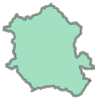

In [19]:
gdf_basin["geometry"][0]

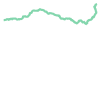

In [20]:
gdf_rivers["geometry"][0]

In [21]:
gdf_rivers["geometry"][10:15]

10    LINESTRING (19.51458 -9.54375, 19.50208 -9.531...
11    LINESTRING (30.80625 -8.36875, 30.80625 -8.360...
12    LINESTRING (24.68125 -8.44792, 24.68125 -8.427...
13    LINESTRING (23.68958 -2.71875, 23.68542 -2.718...
14    LINESTRING (29.76875 -10.77292, 29.77292 -10.7...
Name: geometry, dtype: geometry

## Quick plot

<Axes: >

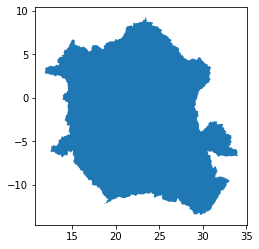

In [22]:
gdf_basin.plot()

<Axes: >

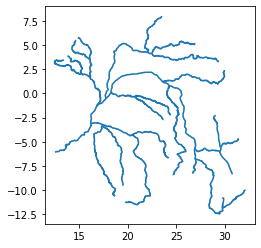

In [23]:
gdf_rivers.plot()

# Plot using Cartopy

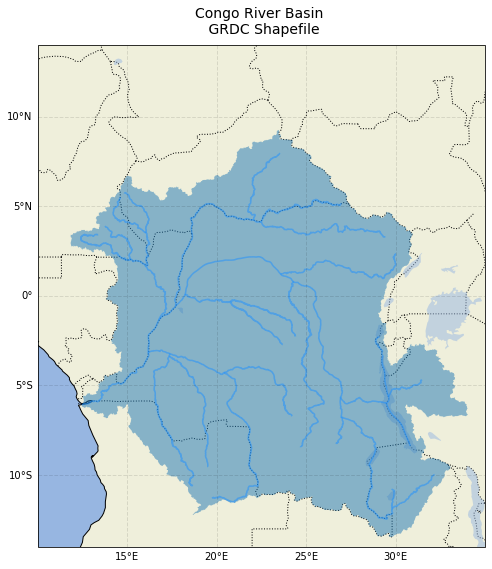

In [24]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([10, 35, -14, 14], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
#ax.add_feature(cfeature.RIVERS)

### add data
ax.add_geometries(gdf_basin["geometry"], crs=ccrs.PlateCarree(), alpha=0.5)
#ax.add_geometries(gdf_rivers["geometry"], crs=ccrs.PlateCarree(), alpha=0.5)
# cartopy add a fill component so its better to use GeoPandas plot functionality
gdf_rivers.plot(ax=ax, color='DodgerBlue', alpha=0.5  )

##### add gridlines and coordinates
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

### add title
ax.set_title('Congo River Basin \n GRDC Shapefile',
             fontsize = 14,
             y=1.01)

plt.tight_layout()

plt.show()

# Plot using cartopy with the WSR background

background map

In [25]:
#stamen_terrain = cimgt.Stamen('terrain-background')
#Note: Stamen basemaps are not available from the usual source as from 31 Oct 2023

In [26]:
## World Shaded Relief

url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg'
WSR_image = cimgt.GoogleTiles(url=url)

plot

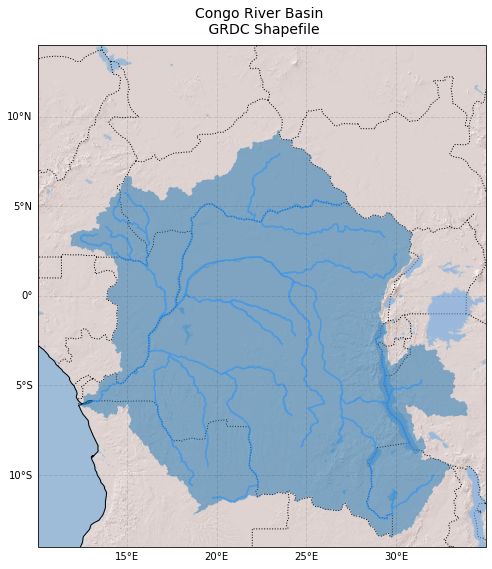

In [27]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([10, 35, -14, 14], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
#ax.add_feature(cfeature.RIVERS)

### add background
ax.add_image(WSR_image, 6)

### add data
ax.add_geometries(gdf_basin["geometry"], crs=ccrs.PlateCarree(), alpha=0.5)
#ax.add_geometries(gdf_rivers["geometry"], crs=ccrs.PlateCarree(), alpha=0.5)
# cartopy add a fill component so its better to use GeoPandas plot functionality

gdf_rivers.plot(ax=ax, color='DodgerBlue', alpha=0.5  )



##### add gridlines and coordinates
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

### add title
ax.set_title('Congo River Basin \n GRDC Shapefile',
             fontsize = 14,
             y=1.01)

plt.tight_layout()

plt.show()

# Plot using cartopy with the WSR background and an inset

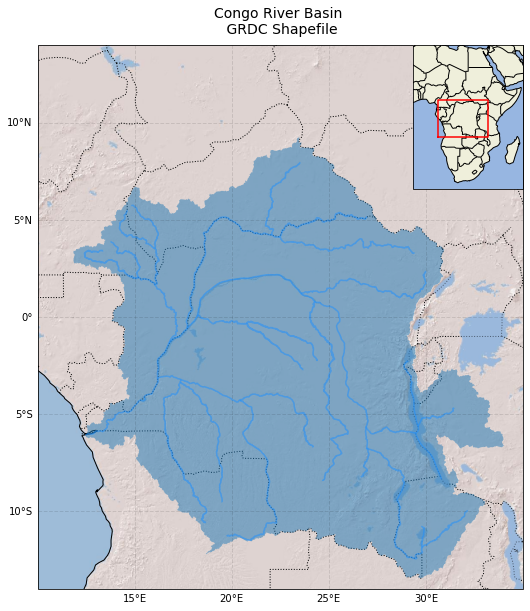

In [28]:
fig = plt.figure()
fig.set_size_inches(12, 10)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([10, 35, -14, 14], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
#ax.add_feature(cfeature.RIVERS)

### add background
ax.add_image(WSR_image, 6)

### add data
ax.add_geometries(gdf_basin["geometry"], crs=ccrs.PlateCarree(), alpha=0.5)
#ax.add_geometries(gdf_rivers["geometry"], crs=ccrs.PlateCarree(), alpha=0.5)
#cartopy add a fill component so its better to use GeoPandas plot functionality
gdf_rivers.plot(ax=ax, color='DodgerBlue', alpha=0.5  )

#### add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True


#### add inset
#(left, bottom, width, height)
inset_ax = plt.axes( [0.605, 0.68, 0.25, 0.2], projection=ccrs.PlateCarree() )
## define extent of inset
inset_ax.set_extent([-2, 52, -35, 30 ] )  # you want this extent bit bigger than your raster extent
#(x,y) coord of the region mapped
x_coord = [10.0, 10.0, 35, 35, 10.0] #Bot-left,Top-Left,Top-Right,Bot-Right,Bot-left
y_coord = [-12.5, 6, 6, -12.5, -12.5] #Bot-left,Top-Left,Top-Right,Bot-Right,Bot-left
#add features for better context
inset_ax.add_feature(cfeature.BORDERS)
inset_ax.add_feature(cfeature.LAND)
inset_ax.add_feature(cfeature.OCEAN)
inset_ax.add_feature(cfeature.COASTLINE)
#add a red box indicating the location
inset_ax.plot(x_coord, y_coord, transform=ccrs.PlateCarree(), zorder=10, color="red")

### add title
ax.set_title('Congo River Basin \n GRDC Shapefile',
             fontsize = 14,
             y=1.01)



plt.show()